In [1]:
#imorting the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#Data collection and processing
#loading the CSV data into pandas dataframe
gold_data = pd.read_csv("///home/nzangi/Downloads/youtube-dl/ML projects/Datasets/gld_price_data.csv")

In [3]:
#Read the 5 roes
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print the 5 last rows
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#numbers of rows and colums
gold_data.shape

(2290, 6)

In [6]:
#get basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#check if theere is missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#stastical information of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#checking the correction of the data
correlation = gold_data.corr()

<AxesSubplot:>

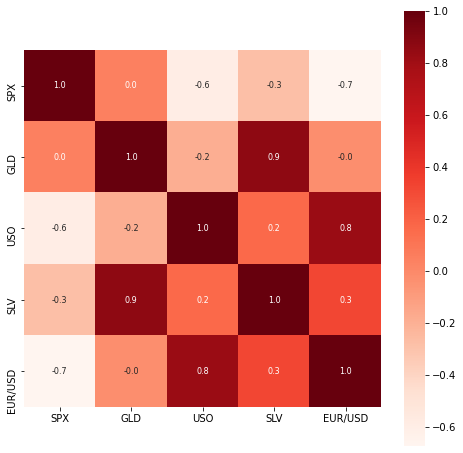

In [16]:
#construct a heat map to undertsand the correction
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [17]:
#correlation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/home/nzangi/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

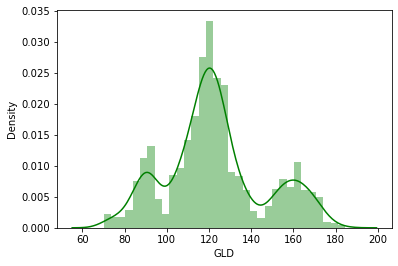

In [20]:
#check the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

In [21]:
#splitting features and target
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [22]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
#splitting into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [43]:
#training model
model = RandomForestRegressor(n_estimators=100)

In [44]:
#training using trainning data
model.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
#model evalution
#prediction on test data
test_data_prediction = model.predict(X_test)

In [46]:
print(test_data_prediction)

[168.66379919  81.94189987 116.13330059 127.5508006  120.61170114
 154.6355969  150.47289895 126.14290026 117.47289852 125.86650085
 116.3056013  171.8395007  141.72279851 167.10489853 115.1353999
 117.6263005  140.88370301 170.11930103 159.66760379 159.80429878
 155.12139989 125.13800032 175.38989924 156.9525037  125.14460025
  93.81109977  77.44150044 120.73170012 119.09439936 167.47629898
  88.13080041 125.34880019  91.0819008  117.7205004  121.16249919
 135.75820138 115.56150113 114.89720065 147.71899979 107.1939007
 104.42790254  87.31419808 126.59980065 117.97230016 152.80429887
 119.57130017 108.41149978 108.12289819  93.11670039 127.18129734
  75.22460011 113.73599921 121.09780012 111.51319907 118.81209895
 120.28699956 159.42139979 168.12120146 147.07839657  85.8853985
  94.28310002  86.89609895  90.58550024 119.01830064 126.40690085
 127.41600003 170.90900032 122.22119928 117.37069873  98.54900016
 168.01760117 143.34349901 131.94800289 121.01190193 121.26469953
 119.90630041

In [47]:
#use of r square error
error_square = metrics.r2_score(Y_test,test_data_prediction)
print(f"The R squared error: {error_square}")

The R squared error: 0.9891188173604499


In [48]:
#compare the actual values and predicacted values on graph
Y_test = list(Y_test)

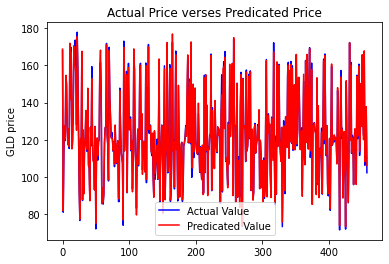

In [49]:
plt.plot(Y_test,color ='blue',label = "Actual Value")
plt.plot(test_data_prediction,color ='red',label= "Predicated Value")
plt.title("Actual Price verses Predicated Price")
plt.ylabel('GLD price')
plt.legend()
plt.show()